1) First, I imported the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

C:\Users\ojare\anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2) Load the MNIST dataset

Next, I loaded the MNIST dataset.

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# load dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


3) Build a trainable pipeline and an evaluation pipeline

In [3]:
# build a trainable pipeline
def normalize_img(image, label):
    """Normalizes images: 'uint8' -> 'float32.'"""
    return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE
)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)


# building an evaluation pipeline
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE
)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


4) Defining the model architecture

In [4]:
# Define the model architecture
model = Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation=tf.nn.leaky_relu),
    layers.Dense(10, activation=tf.nn.softmax)
])


5)Compile and train the model

I compiled and train the model using the MNIST dataset.

In [5]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
# Train the model
epochs = 10
history = model.fit(
    ds_train,
    epochs=epochs,
    validation_data=ds_test
)


Epoch 1/10


C:\Users\ojare\anaconda3\envs\tensorflow\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


469/469 [==============================] - 15s 11ms/step - loss: 0.3730 - sparse_categorical_accuracy: 0.8965 - val_loss: 0.2215 - val_sparse_categorical_accuracy: 0.9356
Epoch 2/10
469/469 [==============================] - 4s 6ms/step - loss: 0.1971 - sparse_categorical_accuracy: 0.9440 - val_loss: 0.1822 - val_sparse_categorical_accuracy: 0.9481
Epoch 3/10
469/469 [==============================] - 4s 6ms/step - loss: 0.1472 - sparse_categorical_accuracy: 0.9574 - val_loss: 0.1371 - val_sparse_categorical_accuracy: 0.9592
Epoch 4/10
469/469 [==============================] - 4s 6ms/step - loss: 0.1171 - sparse_categorical_accuracy: 0.9657 - val_loss: 0.1168 - val_sparse_categorical_accuracy: 0.9644
Epoch 5/10
469/469 [==============================] - 4s 6ms/step - loss: 0.0970 - sparse_categorical_accuracy: 0.9714 - val_loss: 0.1073 - val_sparse_categorical_accuracy: 0.9670
Epoch 6/10
469/469 [==============================] - 4s 6ms/step - loss: 0.0811 - sparse_categorical_accurac

6)Finally, the visualizations of training results

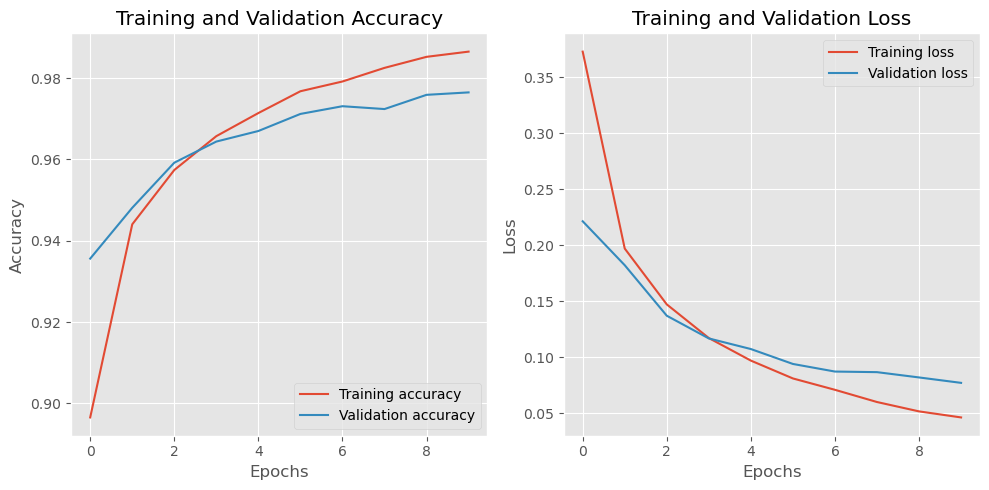

In [6]:
# Visualizing the training results

acc = history.history["sparse_categorical_accuracy"]
val_acc = history.history["val_sparse_categorical_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.style.use('ggplot')
plt.rc('font', family='sans-serif')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot Training and Validation Accuracy
ax[0].plot(epochs_range, acc, label="Training accuracy")
ax[0].plot(epochs_range, val_acc, label="Validation accuracy")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend(loc="lower right")
ax[0].set_title("Training and Validation Accuracy")

# Plot Training and Validation Loss
ax[1].plot(epochs_range, loss, label="Training loss")
ax[1].plot(epochs_range, val_loss, label="Validation loss")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend(loc="upper right")
ax[1].set_title("Training and Validation Loss")

# Set layout and save
fig.tight_layout()
plt.savefig('training_results.png')
plt.show()
